#  DATA SCIENCE:CASE STUDY #
## Data Investigation and Exploratory Analysis for Mavencloudlimited_call_records
*** Author: Nkahebwa Norris(2023) ***
#### Solution 3

In [1]:
#### Importing libraries that are going to be used for the remainder of the class

#import the data manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sbn
# for handling imbalanced data
# you should install the extension using 
# "! conda install -c conda-forge imbalanced-learn"
from imblearn.over_sampling import SMOTE

# for data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# for model evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Importing statistical modeling modules
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# load the dataset
data = pd.read_csv("/home/future/Desktop/Data_science_class/Case_Study/drive-download-20230314T185227Z-001/mavencloudlimited_call_records.csv")

In [3]:
# Create a Copy of the dataset
df = data.copy()

In [4]:
# Creating table for missing data analysis
def draw_missing_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Nulls in dataset', 'Percent of Nulls'])
    return missing_data

In [5]:
# Analyse missing data
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
occupation,95,0.002966
language,1,0.000031
call_id,0,0.000000
destination_person_id,0,0.000000
source_person_id,0,0.000000
account_age,0,0.000000
account_state,0,0.000000
call_direction,0,0.000000
call_duration,0,0.000000
call_outcome,0,0.000000


In [6]:
#Droping all the missing values
df = df.dropna()

In [7]:
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
call_id,0,0.0
destination_person_id,0,0.0
source_person_id,0,0.0
account_age,0,0.0
account_state,0,0.0
occupation,0,0.0
language,0,0.0
call_direction,0,0.0
call_duration,0,0.0
call_outcome,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 0 to 32025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                31931 non-null  int64  
 1   destination_person_id  31931 non-null  int64  
 2   source_person_id       31931 non-null  int64  
 3   account_age            31931 non-null  int64  
 4   account_state          31931 non-null  object 
 5   occupation             31931 non-null  object 
 6   language               31931 non-null  object 
 7   call_direction         31931 non-null  object 
 8   call_duration          31931 non-null  float64
 9   call_outcome           31931 non-null  object 
 10  call_end_date          31931 non-null  object 
 11  call_topics            31931 non-null  object 
 12  call_topic_group       31931 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.4+ MB


In [9]:
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes


In [10]:
# Define a function to apply to each row of the DataFrame
def check_churn(row):
    if row["account_state"] in ["Suspended", "Cancelled"]:
        return "yes"
    elif row["account_state"] in ["Complete", "In Repayment"]:
        return "no"
    else:
        return "unknown"

# Apply the function to each row of the DataFrame and create a new column called "churn"
df["churn"] = df.apply(check_churn, axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 0 to 32025
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                31931 non-null  int64  
 1   destination_person_id  31931 non-null  int64  
 2   source_person_id       31931 non-null  int64  
 3   account_age            31931 non-null  int64  
 4   account_state          31931 non-null  object 
 5   occupation             31931 non-null  object 
 6   language               31931 non-null  object 
 7   call_direction         31931 non-null  object 
 8   call_duration          31931 non-null  float64
 9   call_outcome           31931 non-null  object 
 10  call_end_date          31931 non-null  object 
 11  call_topics            31931 non-null  object 
 12  call_topic_group       31931 non-null  object 
 13  churn                  31931 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.7+ 

In [12]:
#selecting the necessary columns from the dataframe
# or dropping unwanted columns
df = df.drop(['call_id', 'destination_person_id','source_person_id'], axis=1)
df

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
0,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other,no
1,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes,no
2,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue,no
3,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes,no
4,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes,no
...,...,...,...,...,...,...,...,...,...,...,...
32021,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11/03/17 03:08 PM,MM Issue,Finance,no
32022,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11/03/17 03:09 PM,"Redeem Code, Code Entry Support",Codes,no
32023,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11/03/17 03:09 PM,Ended Call- Hearing/Speaking Issues,Other,no
32024,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11/03/17 03:10 PM,Account Association,Sales,yes


In [13]:
#Uisng labelEncorder to encode the categorical values

le=LabelEncoder()
def encode(data_set, column):
    data_set[str(column)] = le.fit_transform(data_set[str(column)])
    

In [14]:
#Pass the column names to encode into a list
list_of_columns = ['account_state', 'occupation', 'language','call_direction','call_outcome','call_topics','call_topic_group','call_end_date','churn']

for item in list_of_columns:
    encode(df,item)
#Display part of the dataframe
df.sample(5)

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
1085,68,2,29,11,0,4.10,0,785,532,5,0
21366,395,2,32,12,0,1.80,0,6655,634,8,0
18119,54,2,29,17,0,6.07,0,6196,722,7,0
29717,0,2,11,17,0,5.88,0,9686,42,8,0
8024,0,2,29,17,1,14.50,10,3008,1195,8,0


In [15]:
df.head(5)

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
0,301,2,11,11,0,0.78,0,166,162,6,0
1,122,2,24,11,0,1.93,0,170,261,3,0
2,695,2,19,11,0,4.90,0,172,978,1,0
3,22,2,11,9,0,3.77,0,173,261,3,0
4,44,2,9,11,0,2.62,0,175,261,3,0


In [16]:
df.tail(5)

,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,churn
32021,68,2,29,17,0,6.55,0,10506,731,4,0
32022,183,2,11,22,0,12.90,0,10507,1014,3,0
32023,386,2,11,11,0,1.25,0,10507,503,6,0
32024,1146,0,2,3,0,2.98,0,10508,42,8,1
32025,0,2,29,11,0,3.08,0,10509,42,8,0


In [17]:
#create a data frame with only our target columns for further analysis
teldata= pd.DataFrame(df, columns=['account_age', 'account_state', 'occupation', 'language', 'call_direction','call_duration','call_topics', 'churn'])

In [18]:
teldata

,account_age,account_state,occupation,language,call_direction,call_duration,call_topics,churn
0,301,2,11,11,0,0.78,162,0
1,122,2,24,11,0,1.93,261,0
2,695,2,19,11,0,4.90,978,0
3,22,2,11,9,0,3.77,261,0
4,44,2,9,11,0,2.62,261,0
...,...,...,...,...,...,...,...,...
32021,68,2,29,17,0,6.55,731,0
32022,183,2,11,22,0,12.90,1014,0
32023,386,2,11,11,0,1.25,503,0
32024,1146,0,2,3,0,2.98,42,1


In [19]:
teldata.describe()

,account_age,account_state,occupation,language,call_direction,call_duration,call_topics,churn
count,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000
mean,341.096740,1.878175,17.193605,11.897279,0.241208,4.803508,460.473991,0.021421
std,305.969892,0.387080,9.430786,6.619910,0.427823,4.907947,351.571144,0.144786
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,2.000000,11.000000,9.000000,0.000000,1.550000,199.000000,0.000000
50%,297.000000,2.000000,11.000000,11.000000,0.000000,3.580000,331.000000,0.000000
75%,570.000000,2.000000,28.000000,17.000000,0.000000,6.200000,731.000000,0.000000
max,1430.000000,3.000000,35.000000,27.000000,1.000000,57.870000,1208.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 0 to 32025
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_age       31931 non-null  int64  
 1   account_state     31931 non-null  int64  
 2   occupation        31931 non-null  int64  
 3   language          31931 non-null  int64  
 4   call_direction    31931 non-null  int64  
 5   call_duration     31931 non-null  float64
 6   call_outcome      31931 non-null  int64  
 7   call_end_date     31931 non-null  int64  
 8   call_topics       31931 non-null  int64  
 9   call_topic_group  31931 non-null  int64  
 10  churn             31931 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.9 MB


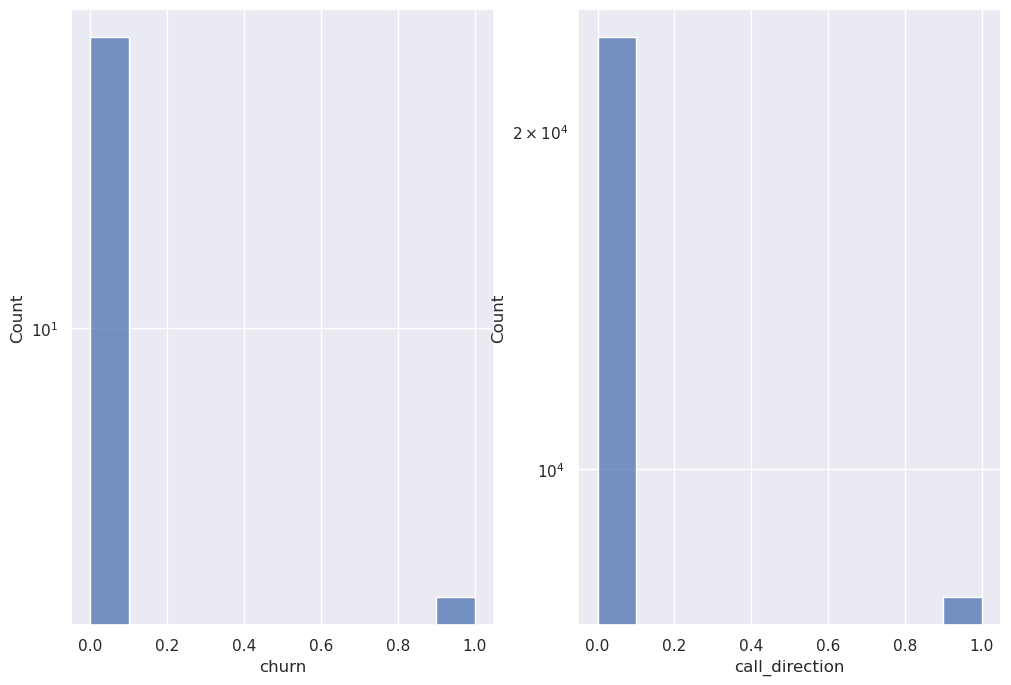

In [21]:
zero_data = teldata[teldata['call_duration'] == 0]

sbn.set()
fig,ax = plt.subplots(1, 2, figsize=(12,8))
sbn.histplot(x='churn', data=zero_data, ax=ax[0], bins=10)
sbn.histplot(x='call_direction', data=teldata, ax=ax[1], bins=10)
ax[0].set(yscale='log')
ax[1].set(yscale='log')
plt.show()

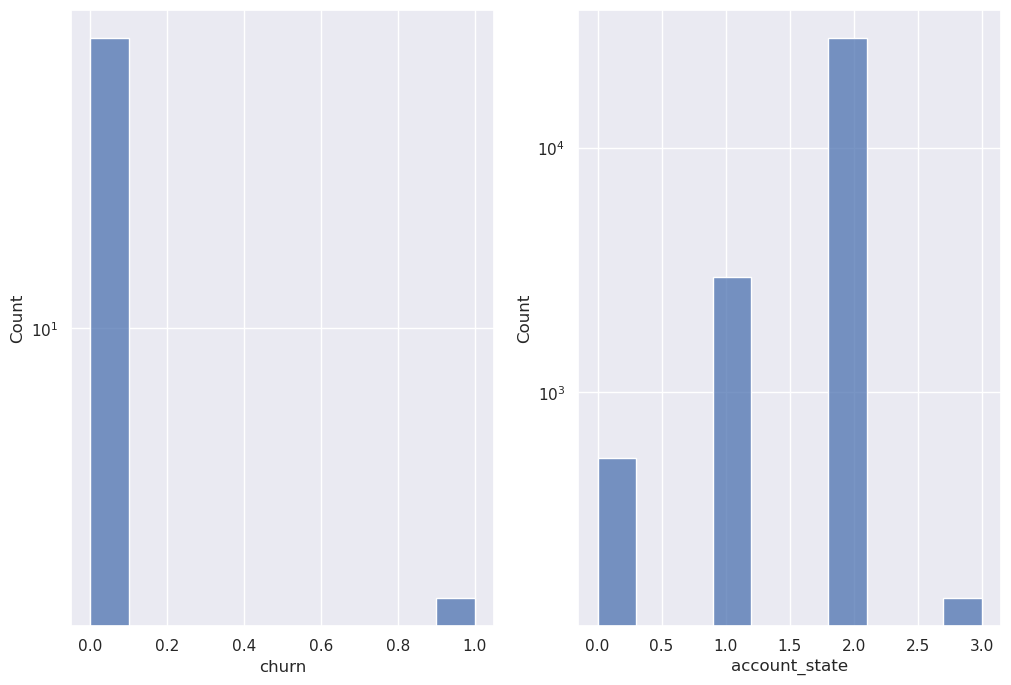

In [22]:
zero_data = teldata[teldata['call_duration'] == 0]

sbn.set()
fig,ax = plt.subplots(1, 2, figsize=(12,8))
sbn.histplot(x='churn', data=zero_data, ax=ax[0], bins=10)
sbn.histplot(x='account_state', data=teldata, ax=ax[1], bins=10)
ax[0].set(yscale='log')
ax[1].set(yscale='log')
plt.show()

In [23]:
df.churn.value_counts()

0    31247
1      684
Name: churn, dtype: int64

Text(0.5, 1.0, 'Graph Showing Churn Counts')

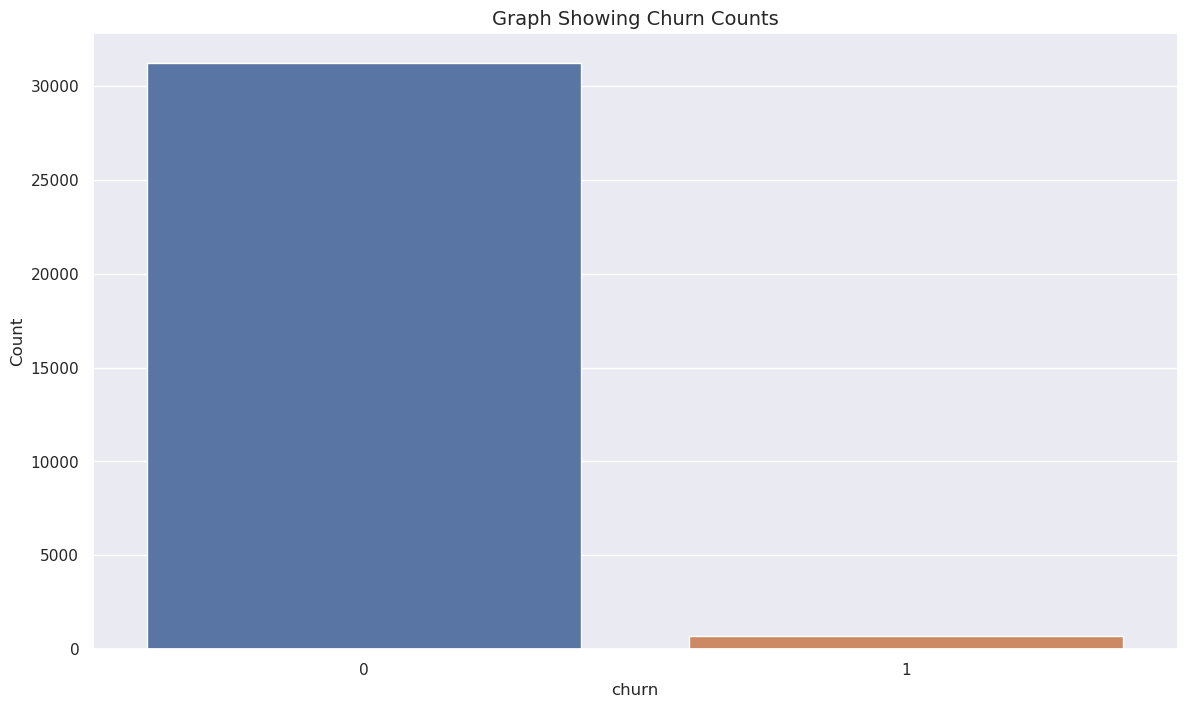

In [24]:
# Visualizing churn alone
plt.figure(figsize=(14, 8))
sbn.countplot(x='churn', data = df)
plt.xlabel('churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Graph Showing Churn Counts', fontsize=14)

> Observations
* From the above statistics and as plotted, we can notice that the zero values in call_duration and account_state column(s) can either mean a new customer or as a result of "churn"
* This is however subject to further analysis as below

#### Dealing with Imbalance

In [25]:
churned = teldata[teldata['churn']==1]
not_churned = teldata[teldata['churn']==0]

print('percentage of churned customer: {}'.format(churned.shape[0]/teldata.shape[0]))
print('percentage of not-churned customer: {}'.format(not_churned.shape[0]/teldata.shape[0]))

percentage of churned customer: 0.021421189439729416
percentage of not-churned customer: 0.9785788105602706


> Observations
* From the above output, we can reliably discover that only 2% of data is related to the churned customers and 98% of data is related to the non-churned customer. 
* This indicates a great difference. 
* Thus,the minority class has to be oversampled and to achieve this, i will Synthetic Minority Over-sampling Technique(SMOTE) which makes synthetic data using the characteristics of the nearest neighbours.

* Reason: We do not want to test the machine learning model on fake data! 
* Thus, we are only using this technique on the training data and consquently, we are splitting the data using train_test_split from scikit-learn.

In [26]:
#teldata.sort_values (by='call_outcome', ascending=False)

In [27]:
teldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 0 to 32025
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_age     31931 non-null  int64  
 1   account_state   31931 non-null  int64  
 2   occupation      31931 non-null  int64  
 3   language        31931 non-null  int64  
 4   call_direction  31931 non-null  int64  
 5   call_duration   31931 non-null  float64
 6   call_topics     31931 non-null  int64  
 7   churn           31931 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.2 MB


In [28]:
# Replace missing values with the mean of the column
teldata = teldata.fillna(teldata.mean())

In [29]:
# Check for infinity values
print(np.isinf(teldata).sum())

# Replace positive/negative infinity with a large finite value
teldata = teldata.replace([np.inf, -np.inf], np.finfo('float64').max)

account_age       0
account_state     0
occupation        0
language          0
call_direction    0
call_duration     0
call_topics       0
churn             0
dtype: int64


In [30]:
# Check for missing values
print(teldata.isnull().sum())

account_age       0
account_state     0
occupation        0
language          0
call_direction    0
call_duration     0
call_topics       0
churn             0
dtype: int64


> Observation
* We further note that our teldata contains 8 columns and coherrently, there's need to investigate if all of them important
This is going to be achieved by use of a correlation matrix

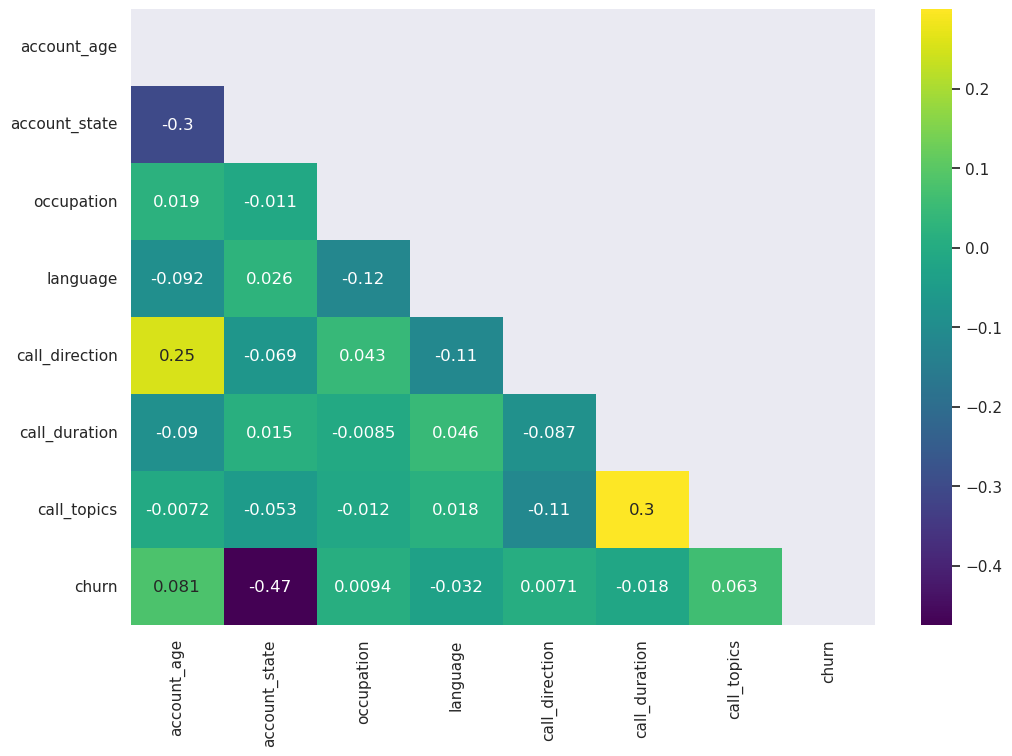

In [31]:
plt.figure(figsize=(12,8))
corr = teldata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sbn.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.show()

* From our output above, we notice that the correlations between call_duration and call_direction are the only remarkable ones though weak. 
* Thus, we can include either of them.
* As aresult, i am removing call_direction from the data and considering the other.

In [32]:
teldata=teldata.drop('call_direction', axis=1)

In [33]:
from collections import Counter

# splitting the data as X and y
X = teldata.drop(['churn'], axis=1)
y = teldata['churn']

# making a SMOTE object
resampler = SMOTE(random_state=5)

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# resampling the data
X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

# verifying the resampled data
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 24997, 1: 24997})


* From the above output for the resampled data set, we now have a balanced data

In [34]:
# Scaling the Numeric Data before training 
# making a ColumnTransformer object
ct = ColumnTransformer(
    [('scaler', StandardScaler(), ['call_duration', 'account_age'])], remainder='passthrough')

# transforming data
X_scaled = ct.fit_transform(X_resampled)
X_test_scaled = ct.transform(X_test)

##### Training Our Model
* Here am using Logistic Regression for classification

In [35]:
# making an object for LogisticRegression
linear_reg = LogisticRegression()
# define the multinomial logistic regression model with a default penalty
linear_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 100000) # create an object of the logistic regression class
# fitting the data
linear_reg.fit(X_scaled, y_resampled)

# predicting on x_test
y_pred = linear_reg.predict(X_test_scaled)
params = linear_reg.get_params
print(params)

<bound method BaseEstimator.get_params of LogisticRegression(max_iter=100000, multi_class='multinomial', solver='sag')>


In [36]:
#Print model parameters
print('Intercept: \n', linear_reg.intercept_)
print('Coefficients: \n', linear_reg.coef_)

Intercept: 
 [0.96445635]
Coefficients: 
 [[-1.83505013e-01  4.12187321e-01 -8.85611304e-01  5.15406698e-03
  -1.76753863e-02  4.45396649e-04]]


In [37]:
#Calculate odds ratio estimates

np.exp(linear_reg.coef_)

array([[0.8323477 , 1.51011729, 0.41246196, 1.00516737, 0.98247991,
        1.0004455 ]])

In [38]:
col_names = ['yes', 'no']

## Confusion Matrix Plot true vs pred values  ##
#########################################################################
def CM(y_test, y_pred_test, col_names, model='model', fs=(8,6)):
    
    plt.rcParams.update({'font.size': 14})
    
    # Forming confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=fs)
    sbn.heatmap(c_matrix, annot=True, annot_kws={'size':15},
                fmt=".0f", cmap=plt.cm.Purples, linewidths=5)
    
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {model} Model')
    plt.show()


In [39]:
#Use statsmodels to assess variables

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))

logit_model

# fit the model and get results
result = logit_model.fit()

# formulate the summary statistics
stats1 = result.summary()
stats2 = result.summary2()

# print the summary stats
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.055622
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                  churn   No. Observations:                25544
Model:                        MNLogit   Df Residuals:                    25537
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.4625
Time:                        12:54:25   Log-Likelihood:                -1420.8
converged:                       True   LL-Null:                       -2643.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
      churn=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8233      0.235      3.507      0.000       0.363       1.283
account_age      -0.

In [40]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.sample(10)

,Actual value,Predicted value
23935,1,0
13564,0,0
12347,0,0
1242,0,0
2888,0,0
31051,0,1
21999,0,0
15307,0,0
12032,0,0
18627,0,0


### Using Sklearn: Decision Tree

In [41]:

# fitting the data
linear_reg.fit(X_scaled, y_resampled)

# predicting on x_test
y_pred = linear_reg.predict(X_test_scaled)

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      6250
           1       0.12      0.77      0.21       137

    accuracy                           0.87      6387
   macro avg       0.56      0.82      0.57      6387
weighted avg       0.98      0.87      0.92      6387



> Classification Report Interpretation:
1. Precision: Out of all the "churn" data that the model predicted, only 13% actually churned whereas only 99% did not churn.
2. Recall: Out of all the "churn" data that the model predicted, 88% of the outcome was correct for not churning and likewise only 80% for churning.
3. F1 Score: This value is calculated as:
    • F1 Score: 2 * (Precision * Recall) / (Precision + Recall) 
    • F1 Scores: 0.93 and 0.70 for not churning and churning respectively.
Since this value for churnig is very close to 1, it tells us that the model does a good job of predicting the likeliness of the subscribers to churn the services as well as not to churn.
4. Support: These values simply tell us how many samples belonged to each class in the test dataset. We can see that among the samples in the test dataset, 6250 were not churning and only 137 were churning.

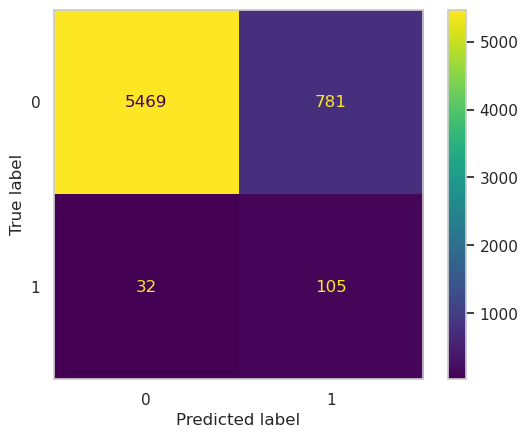

In [43]:
# this line removes the grid from the confusion matrix
sbn.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Confusion Matrix: Interpretation

* The diagonal elements are the correctly predicted samples. 

* True positive: 5501 records of churning were predicted correctly by the model.

* False-positive: 749 records of not churnig were wrongly predicted as churning records

* False-negative: 28 records of not churning were wrongly predicted as churning records

* True Negative: 109 records of not churning were predicted correctly by the model.
* Note: The above output changes as we re run the model